# Lab 4: Linear Regression

In this assignment, we will learn the Linear Regression model. 

First, please study the given example, which uses linear regression for the house price prediction task. In this example, you will learn how to preprocess data, how to train the model, and how to evaluate the model. 

Based on the given example and Lab Assignment 3, your task is to use the linear regression model to predict the medical cost for the dataset given in Lab Assignment 3. 

## 1. Example: Linear Regression for House Price Prediction

In this example, we use the house price dataset. It gives the attributes and price of each house. The task is to build a linear regression model to make prediction for the price of the house.

### 1.1 Preprocess the raw data

When given a new dataset, we need to deal with the missing values and categorical features. 

In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error,mean_squared_error
import matplotlib.pyplot as plt


df = pd.read_csv('housing.csv')

# 0. fill in missing values
mean_val = df['total_bedrooms'].mean()
df['total_bedrooms'] = df['total_bedrooms'].fillna(mean_val)
print(df.isnull().sum())

# 1. convert categorical features to numerical values
labelencoder = LabelEncoder()
df['ocean_proximity'] = labelencoder.fit_transform(df['ocean_proximity'])
print(df.info())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null int64
total_rooms           20640 non-null int64
total_bedrooms        20640 non-null float64
population            20640 non-null int64
households            20640 non-null int64
median_income         20640 non-null float64
median_house_value    20640 non-null int64
ocean_proximity       20640 non-null int64
dtypes: float64(4), int64(6)
memory usage: 1.6 MB
None


### 1.2 Split the preprocessed dataset into training set and testing set

For the supervised learning, we need to split the dataset into the training set and test set. The training set is used to learn model parameters and the testing set is used to evaluate the learned model. 

Note that the testing set is NOT allowed to be used in the training phase. 

In [11]:
# 2. split samples
house_fea = df.drop('median_house_value', axis=1).values
house_price = df['median_house_value'].values
house_price = house_price / np.max(house_price)

X_train,X_test,y_train,y_test = train_test_split(house_fea,
                                                 house_price,
                                                 test_size=0.2,
                                                 random_state=42)
print(X_train.shape)
print(X_test.shape)


# normalize features
normalizer = StandardScaler()
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)

(16512, 9)
(4128, 9)


### 1.3 Train the linear regression model 

$\min_{w}\frac{1}{n}\|y-X\mathbf{w}\|_2^2$



Here, we use the training set to learn the model parameter $\mathbf{w}=(w_0, w_1, w_2, \cdots, w_d)$. 

Then, we compute MAE, MSE, and RMSE to see how well the learned model fit the training set. 

In [12]:
#3. train the model
lr = LinearRegression()

lr.fit(X_train,y_train)

print("bias is "+str(lr.intercept_))
print("coefficients  is "+str(lr.coef_))

y_train_pred = lr.predict(X_train)

mae = mean_absolute_error(y_train_pred,y_train)
mse = mean_squared_error(y_train_pred,y_train)
rmse = np.sqrt(mse)

print('prediction for training set:')
print('MAE is: {}'.format(mae))
print('MSE is: {}'.format(mse))
print('RMSE is: {}'.format(rmse))


bias is 0.41438855869860675
coefficients  is [-0.17170955 -0.18189176  0.02984855 -0.0353864   0.09753502 -0.08776816
  0.03520256  0.15428789 -0.00090304]
prediction for training set:
MAE is: 0.10125365457873205
MSE is: 0.0192437559440504
RMSE is: 0.13872186541439818


### 1.4 Evaluate the linear regression model

After obtaining the model parameter $\mathbf{w}=(w_0, w_1, w_2, \cdots, w_d)$, the linear regression model is determined. Then, we need to evaluate this model to see how well this model generaizes on the testing set. 

prediction for testing set:
MAE is: 0.1036935483109797
MSE is: 0.02022001958450324
RMSE is: 0.14219711524677017


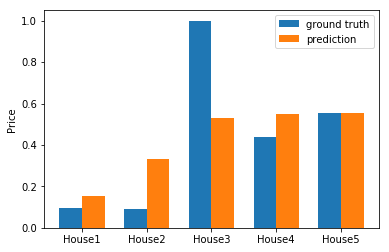

In [13]:
#4. evaluate the model
y_test_pred = lr.predict(X_test)

mae = mean_absolute_error(y_test_pred,y_test)
mse = mean_squared_error(y_test_pred,y_test)
rmse = np.sqrt(mse)

print('prediction for testing set:')
print('MAE is: {}'.format(mae))
print('MSE is: {}'.format(mse))
print('RMSE is: {}'.format(rmse))


labels = ['House1', 'House2', 'House3', 'House4', 'House5']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, y_test[0:5], width, label='ground truth')
rects2 = ax.bar(x + width/2, y_test_pred[0:5], width, label='prediction')

ax.set_ylabel('Price')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()


## 2. Task: Linear Regression for Medical Cost Prediction

Following the given example, build a linear regression model for [the insurance dataset](./insurance.csv) to predict the medical cost.  


### 2.1 Preprocess the raw data

Based on your Lab Assignment 3, deal with the missing values and categorical features. 

In [20]:
#include libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error,mean_squared_error
import matplotlib.pyplot as plt

#import the data frame
df = pd.read_csv('insurance.csv')
print(df, "\n")

#check missing values
print(df.isnull().sum(), "\n")

#convert catgorical values into numerical 
print(df.info(), "\n")
labelencoder = LabelEncoder()
df['sex'] = labelencoder.fit_transform(df['sex'])
df['smoker'] = labelencoder.fit_transform(df['smoker'])
df['region'] = labelencoder.fit_transform(df['region'])

print(df.info(), "\n")

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns] 

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 e

### 1.2 Split the preprocessed dataset into training set and testing set

Use 80% of samples as the training set and 20% of samples as the testing set

In [24]:
# split samples
insurance_fea = df.drop('charges', axis=1).values
insurance_price = df['charges'].values
insurance_price = insurance_price / np.max(insurance_price)

X_train,X_test,y_train,y_test = train_test_split(insurance_fea,
                                                 insurance_price,
                                                 test_size=0.2,
                                                 random_state=42)
print(X_train.shape)
print(X_test.shape)


# normalize features
normalizer = StandardScaler()
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)

(1070, 6)
(268, 6)


### 1.3 Train the linear regression model 

Use the Linear regression model to do prediction

$\min_{w}\frac{1}{n}\|y-X\mathbf{w}\|_2^2$

Please output the learned model parameter $\mathbf{w}$ and see how the learned model fit the training set. 

In [25]:
lr = LinearRegression()

lr.fit(X_train,y_train)

print("bias is "+str(lr.intercept_))
print("coefficients  is "+str(lr.coef_))

y_train_pred = lr.predict(X_train)

mae = mean_absolute_error(y_train_pred,y_train)
mse = mean_squared_error(y_train_pred,y_train)
rmse = np.sqrt(mse)

print('prediction for training set:')
print('MAE is: {}'.format(mae))
print('MSE is: {}'.format(mse))
print('RMSE is: {}'.format(rmse))

bias is 0.20928336460705027
coefficients  is [ 5.67051024e-02 -1.47293258e-04  3.18064131e-02  8.10191467e-03
  1.49867951e-01 -4.74182139e-03]
prediction for training set:
MAE is: 0.06599864797091512
MSE is: 0.00916737434945697
RMSE is: 0.09574640645714579


### 1.4 Evaluate the linear regression model


Evaluate the learned model to see how well this model generaizes on the testing set. 

prediction for testing set:
MAE is: 0.06564969107169771
MSE is: 0.008270951713078178
RMSE is: 0.09094477287386109


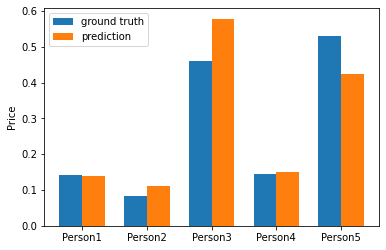

In [27]:
#evaluate the model
y_test_pred = lr.predict(X_test)

mae = mean_absolute_error(y_test_pred,y_test)
mse = mean_squared_error(y_test_pred,y_test)
rmse = np.sqrt(mse)

print('prediction for testing set:')
print('MAE is: {}'.format(mae))
print('MSE is: {}'.format(mse))
print('RMSE is: {}'.format(rmse))


labels = ['Person1', 'Person2', 'Person3', 'Person4', 'Person5']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, y_test[0:5], width, label='ground truth')
rects2 = ax.bar(x + width/2, y_test_pred[0:5], width, label='prediction')

ax.set_ylabel('Price')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show() 

### 1.5 Use the ridge regression model to do prediction

$\min_{w}\frac{1}{n}\|y-Xw\|_2^2 + \lambda \|w\|_2^2$

* 1.5.1 Compare its performance on the testing set with that of the standard linear regression model $\min_{w}\frac{1}{n}\|y-Xw\|_2^2$

* 1.5.2 Use different $\lambda$ to see how it affects the performance of the ridge regression  model on the testing set


1.5.1

bias is 0.20928336460705027
coefficients is [ 5.66477072e-02 -1.36912304e-04  3.17814658e-02  8.09963575e-03
  1.49724329e-01 -4.73350751e-03]
prediction for testing set
MAE is: 0.06567262940074653
MSE is: 0.0082725766695483
RMSE is 0.09095370618918341


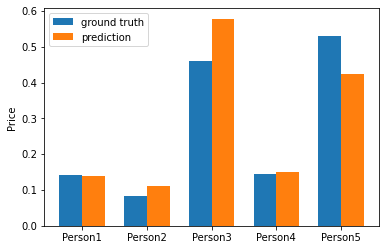

comparing the preformance of the ridege regression model (1.5.1) and the linear training model (1.4):
the numerical values of the errors are extremly close


In [50]:
print('1.5.1\n')

rr = Ridge(alpha = 1)
rr.fit(X_train,y_train)

print("bias is " +str(rr.intercept_))
print("coefficients is " +str(rr.coef_))

y_test_pred = rr.predict(X_test)
 
mae = mean_absolute_error(y_test_pred,y_test)
mse = mean_squared_error(y_test_pred,y_test)
rmse = np.sqrt(mse)

print('prediction for testing set')
print('MAE is: {}'.format(mae))
print('MSE is: {}'.format(mse))
print('RMSE is {}'.format(rmse))


labels = ['Person1', 'Person2', 'Person3', 'Person4', 'Person5']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, y_test[0:5], width, label='ground truth')
rects2 = ax.bar(x + width/2, y_test_pred[0:5], width, label='prediction')

ax.set_ylabel('Price')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show() 

print('comparing the preformance of the ridege regression model (1.5.1) and the linear training model (1.4):')
print('the numerical values of the errors are extremly close')

In [66]:
print('1.5.2\n')


print('𝜆 = 0.1')
rr = Ridge(alpha = 0.1)
rr.fit(X_train,y_train)

print("bias is " +str(rr.intercept_))
print("coefficients are " +str(rr.coef_))

y_test_pred = rr.predict(X_test)
 
mae = mean_absolute_error(y_test_pred,y_test)
mse = mean_squared_error(y_test_pred,y_test)
rmse = np.sqrt(mse)

print('prediction for testing set')
print('MAE is: {}'.format(mae))
print('MSE is: {}'.format(mse))
print('RMSE is {}'.format(rmse))


print('\n\n𝜆 = 1.0')
rr = Ridge(alpha = 1.0)
rr.fit(X_train,y_train)

print("bias is " +str(rr.intercept_))
print("coefficients are " +str(rr.coef_))

y_test_pred = rr.predict(X_test)
 
mae = mean_absolute_error(y_test_pred,y_test)
mse = mean_squared_error(y_test_pred,y_test)
rmse = np.sqrt(mse)

print('prediction for testing set')
print('MAE is: {}'.format(mae))
print('MSE is: {}'.format(mse))
print('RMSE is {}'.format(rmse))


print('\n\n𝜆 = 20.0')
rr = Ridge(alpha = 20)
rr.fit(X_train,y_train)

print("bias is " +str(rr.intercept_))
print("coefficients are " +str(rr.coef_))

y_test_pred = rr.predict(X_test)
 
mae = mean_absolute_error(y_test_pred,y_test)
mse = mean_squared_error(y_test_pred,y_test)
rmse = np.sqrt(mse)

print('prediction for testing set')
print('MAE is: {}'.format(mae))
print('MSE is: {}'.format(mse))
print('RMSE is {}'.format(rmse))



print('\n\n𝜆 = 200')
rr = Ridge(alpha = 200)
rr.fit(X_train,y_train)

print("bias is " +str(rr.intercept_))
print("coefficients are " +str(rr.coef_))

y_test_pred = rr.predict(X_test)
 
mae = mean_absolute_error(y_test_pred,y_test)
mse = mean_squared_error(y_test_pred,y_test)
rmse = np.sqrt(mse)

print('prediction for testing set')
print('MAE is: {}'.format(mae))
print('MSE is: {}'.format(mse))
print('RMSE is {}'.format(rmse))


print('\n\n𝜆 = 1000')
rr = Ridge(alpha = 1000)
rr.fit(X_train,y_train)

print("bias is " +str(rr.intercept_))
print("coefficients are " +str(rr.coef_))

y_test_pred = rr.predict(X_test)
 
mae = mean_absolute_error(y_test_pred,y_test)
mse = mean_squared_error(y_test_pred,y_test)
rmse = np.sqrt(mse)

print('prediction for testing set')
print('MAE is: {}'.format(mae))
print('MSE is: {}'.format(mse))
print('RMSE is {}'.format(rmse))


print('\n\n\nObservation:\n' + 
      'Using different values for lambda, '+ 
      'the performance of the ridge regression model on the testing set shows that\n' +
      'the larger the lambda the greater the error. ' + 
      'As lambda decreases, the mean squared error decreases.')

1.5.2

𝜆 = 0.1
bias is 0.20928336460705027
coefficients are [ 5.66993576e-02 -1.46253412e-04  3.18039167e-02  8.10168706e-03
  1.49853576e-01 -4.74098902e-03]
prediction for testing set
MAE is: 0.06565198712488936
MSE is: 0.008271112026766067
RMSE is 0.09094565424893081


𝜆 = 1.0
bias is 0.20928336460705027
coefficients are [ 5.66477072e-02 -1.36912304e-04  3.17814658e-02  8.09963575e-03
  1.49724329e-01 -4.73350751e-03]
prediction for testing set
MAE is: 0.06567262940074653
MSE is: 0.0082725766695483
RMSE is 0.09095370618918341


𝜆 = 20.0
bias is 0.20928336460705027
coefficients are [ 5.55791066e-02  5.31387207e-05  3.13145546e-02  8.05522453e-03
  1.47047190e-01 -4.57960785e-03]
prediction for testing set
MAE is: 0.06613364774215816
MSE is: 0.00831230764817267
RMSE is 0.09117185776418439


𝜆 = 200
bias is 0.20928336460705027
coefficients are [ 0.04716695  0.00132911  0.02747503  0.00757177  0.12576511 -0.00343135]
prediction for testing set
MAE is: 0.07174363643409837
MSE is: 0.00926